In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random
import math
from mpl_toolkits.mplot3d import Axes3D

In [35]:
v_s_mc=np.zeros([7])
v_s_td=np.zeros([7])
true_value=[1/6,2/6,3/6,4/6,5/6]
alpha=0.05
gamma=1
rms_error_td=[]
rms_error_mc=[]
def generate_episode():
    states=[]
    current_state=3
    states.append(current_state)
    while(True):
        if(current_state==0):
            return 0,states
        if(current_state==6):
            return 1,states
        num=np.random.randint(2)
        if(num==0):
            current_state-=1
        else:
            current_state+=1
        states.append(current_state)
for i in range(100000):
    reward,states=generate_episode()
    length=len(states)
    for j in range(length-2):
        v_s_td[states[j]]=v_s_td[states[j]]+alpha*(0+gamma*(v_s_td[states[j+1]])-v_s_td[states[j]])
        v_s_mc[states[j]]=v_s_mc[states[j]]+alpha*(reward-v_s_mc[states[j]])
    v_s_td[states[length-2]]=v_s_td[states[length-2]]+alpha*(reward+gamma*(v_s_td[states[length-1]])-v_s_td[states[length-2]])
    v_s_mc[states[length-2]]=v_s_mc[states[length-2]]+alpha*(reward-v_s_mc[states[length-2]])
    error_mc=0
    error_td=0
    for j in range(5):
        error_mc+=(true_value[j]-v_s_mc[j+1])*(true_value[j]-v_s_mc[j+1])
        error_td+=(true_value[j]-v_s_td[j+1])*(true_value[j]-v_s_td[j+1])
    error_mc=math.sqrt(error_mc)
    error_td=math.sqrt(error_td)
    rms_error_td.append(error_td)
    rms_error_mc.append(error_mc)
print(v_s_td)
print(v_s_mc)



[0.         0.14486267 0.26697023 0.47620395 0.65051566 0.83129696
 0.        ]
[0.         0.04193249 0.03216632 0.3580523  0.58575498 0.7929174
 0.        ]


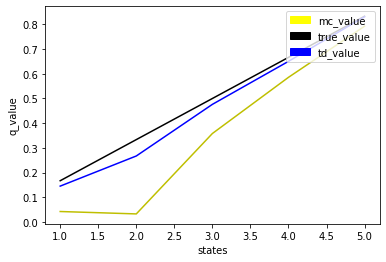

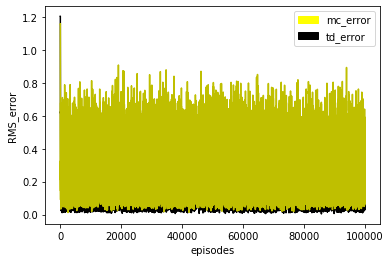

In [36]:
def plot_first():    
    x=[]
    mc_value=[]
    td_value=[]
    for i in range(5):
        mc_value.append(v_s_mc[i+1])
        td_value.append(v_s_td[i+1])
        x.append(i+1)
    plt.plot(x,true_value,'k')
    plt.plot(x,mc_value,'y')
    plt.plot(x,td_value,'b')
    yellow_patch = mpatches.Patch(color='yellow', label='mc_value')
    black_patch = mpatches.Patch(color='black', label='true_value')
    blue_patch = mpatches.Patch(color='blue', label='td_value')
    plt.legend(handles=[yellow_patch,black_patch,blue_patch],loc=1)
    plt.xlabel('states')
    plt.ylabel('q_value')

    plt.show()
plot_first()

def plot_second():
    x=[]
    for i in range(100000):
        x.append(i+1)
    plt.plot(x,rms_error_td,'k')
    plt.plot(x,rms_error_mc,'y')
    yellow_patch = mpatches.Patch(color='yellow', label='mc_error')
    black_patch = mpatches.Patch(color='black', label='td_error')
    plt.legend(handles=[yellow_patch,black_patch],loc=1)
    plt.xlabel('episodes')
    plt.ylabel('RMS_error')

    plt.show()
plot_second()
